In [1]:
from sklearn import tree
from random import randint
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import MNIST
import os

In [2]:
clf_dtc = tree.DecisionTreeClassifier()

In [3]:
x_train_dtc = MNIST.x_train
y_train_dtc = MNIST.y_train
x_test_dtc = MNIST.x_test
y_test_dtc = MNIST.y_test

In [7]:
x_train_dtc[0].shape

(784,)

In [5]:
y_train_dtc

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
predicted_dtc = clf_dtc.predict(x_test_dtc)
expected_dtc = y_test_dtc

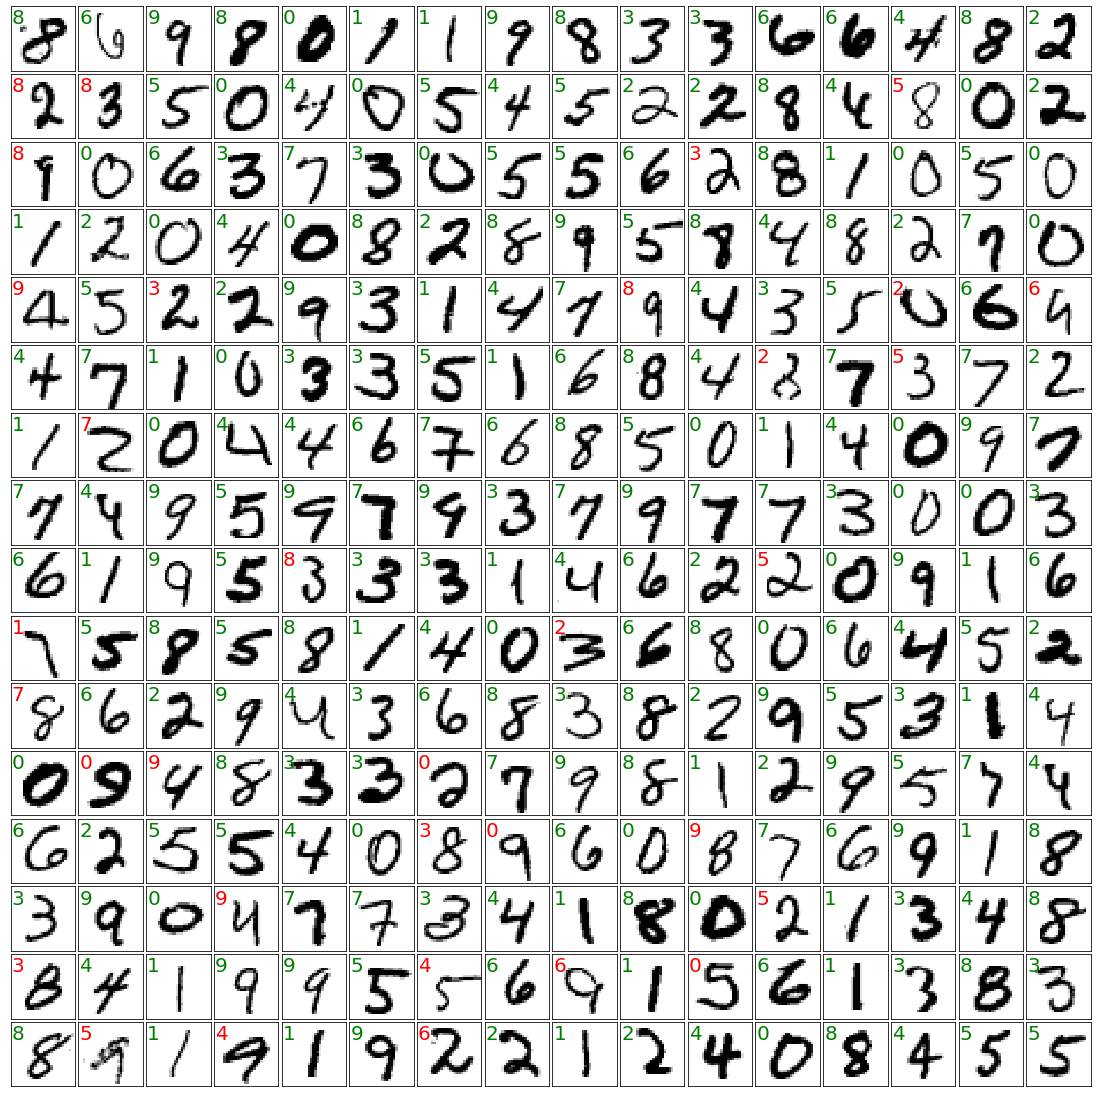

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_dtc) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_dtc.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_dtc[i] == expected_dtc[i]:
        ax.text(0, 7, str(predicted_dtc[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_dtc[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('out.png', dpi=fig.dpi, edgecolor="purple")

In [8]:
print(metrics.classification_report(expected_dtc, predicted_dtc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.86      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.85      0.84      0.85       892
           6       0.90      0.89      0.90       958
           7       0.93      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.86      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [9]:
d_dtc = [array for array in metrics.confusion_matrix(expected_dtc, predicted_dtc)]
data_matrix_dtc = {"0": d_dtc[0], "1": d_dtc[1], "2": d_dtc[2], "3": d_dtc[3], "4": d_dtc[4], \
                   "5": d_dtc[5], "6": d_dtc[6], "7": d_dtc[7], "8": d_dtc[8], "9": d_dtc[9]}
df_matrix_dtc = pd.DataFrame(data=data_matrix_dtc)
df_matrix_dtc

,0,1,2,3,4,5,6,7,8,9
0,914,1,14,6,6,14,17,4,9,15
1,0,1093,8,6,4,7,5,13,7,4
2,8,10,881,31,8,6,9,25,34,10
3,10,2,35,859,6,37,6,20,39,15
4,4,2,12,10,869,11,15,6,17,42
5,12,6,13,40,4,753,18,7,21,12
6,10,7,14,4,13,18,855,3,18,6
7,2,2,24,7,7,4,2,921,9,16
8,14,10,23,21,21,25,26,11,788,25
9,6,2,8,26,44,17,5,18,32,864
